In [1]:
import sys
main_path = "../../.."
sys.path.append(main_path)

# importing modules
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from src.scripts.common_figures import Figures

In [2]:
figures = Figures()
sns.set_context('poster', font_scale=0.8)

# Baseline Figures

In [3]:
df_path = f"{main_path}/data/processed/dataframes"
baseline_df = pd.read_csv(f"{df_path}/baseline_approach.csv")
targets = pd.read_csv(f"{df_path}/targets.csv").values.ravel()

In [4]:
model_scores_path = f"{main_path}/data/processed/model_scores"

with open(f"{main_path}/data/processed/model_scores/best_scores.pkl", 'rb') as f:
    metric_results = pickle.load(f)['baseline']

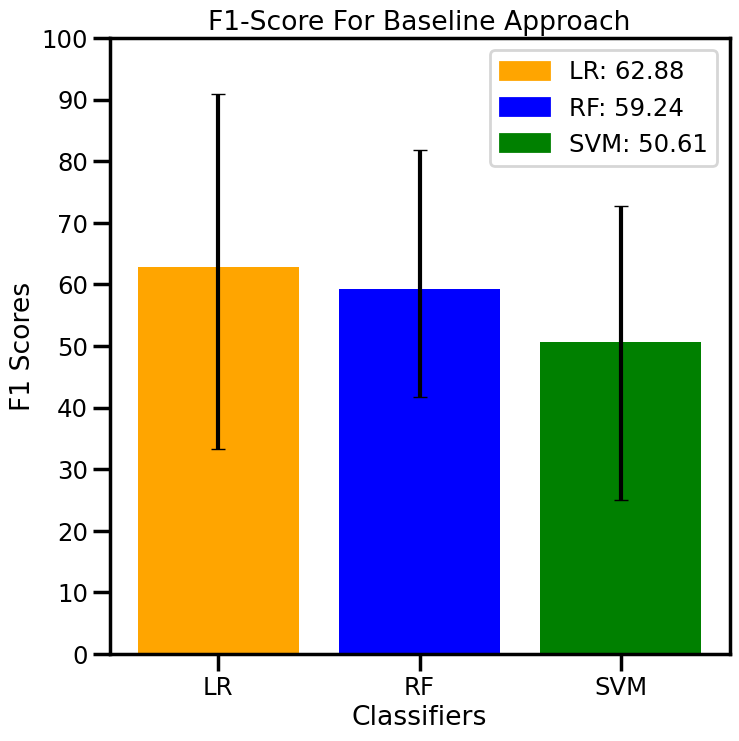

In [5]:
class_names = {'c':'F1-Score For Baseline Approach'}
classifier_names = ['LR', 'RF', 'SVM']

scores = {'c':[metric_results[i.lower()]['f1_scores'] for i in classifier_names]}

save = f"{main_path}/figures/paper_figures/png/f1_score_baseline_approach.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/f1_score_baseline_approach.svg"
figures.draw_bar_plot(classifier_names, scores, class_names, grid_shape=(1, 1),
                      save=save, paper_figure=paper_figure)

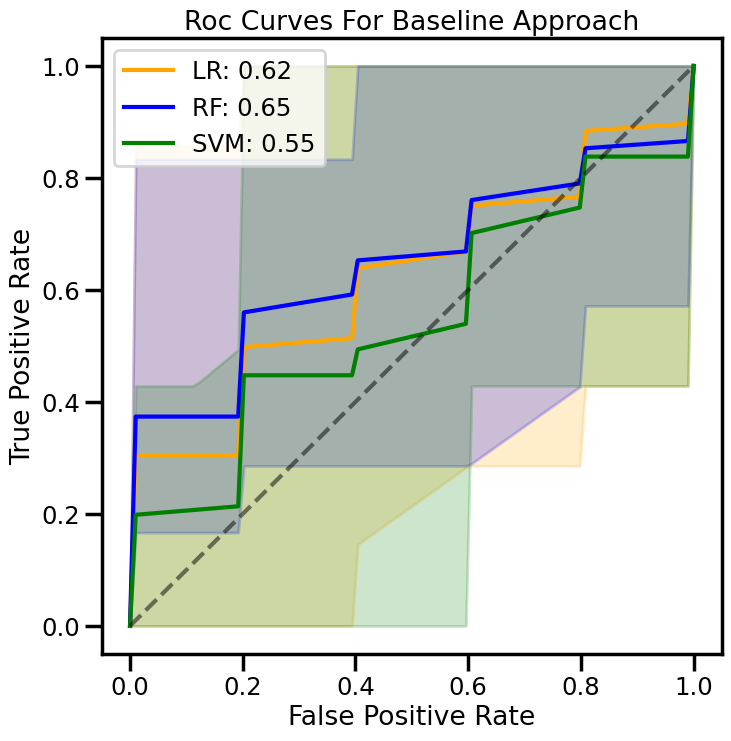

In [6]:
class_names = {'a':'Roc Curves For Baseline Approach'}
classifier_names = ['LR', 'RF', 'SVM']

roc_scores = {'a':[metric_results[i.lower()]['rocauc'] for i in classifier_names]}

save = f"{main_path}/figures/paper_figures/png/roccurves_baseline_approach.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/roccurves_baseline_approach.svg"
figures.draw_rocauc_curve(classifier_names, roc_scores, class_names, grid_shape=(1, 1),
                          save=save, paper_figure=paper_figure)

## Decision Boundaries

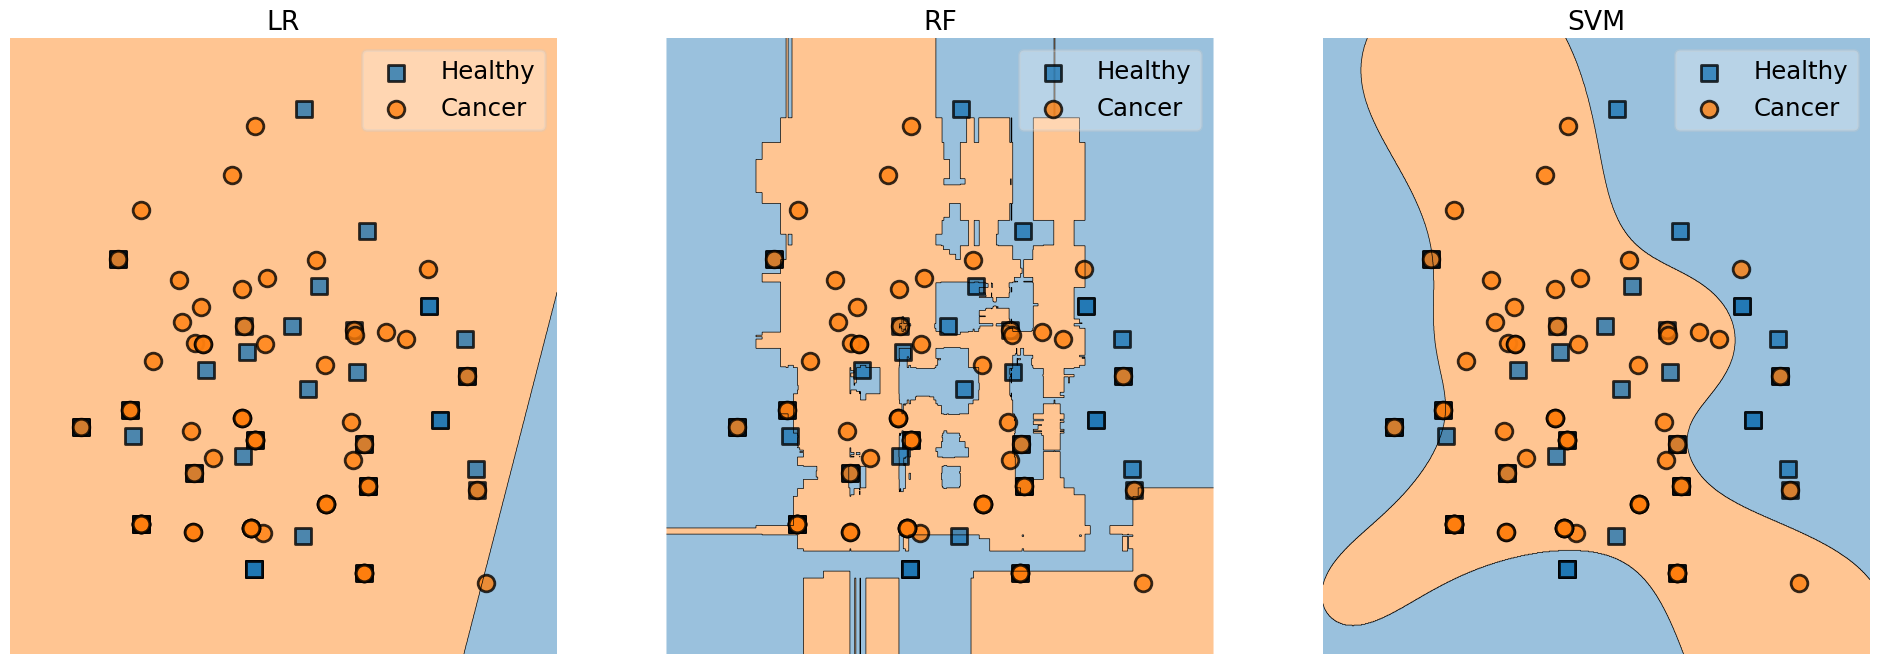

In [7]:
classifiers = [metric_results['lr']['best_estimator'],
               metric_results['rf']['best_estimator'],
               metric_results['svm']['best_estimator']]

classifier_names = ['LR', 'RF', 'SVM']
actual_labels = ["Healthy", "Cancer"]

save = f"{main_path}/figures/baseline_decision_boundaries.png"

figures.plot_decision_boundaries(baseline_df.values, targets, classifiers, classifier_names, actual_labels,
                                grid_shape=(1, 3), save=save)

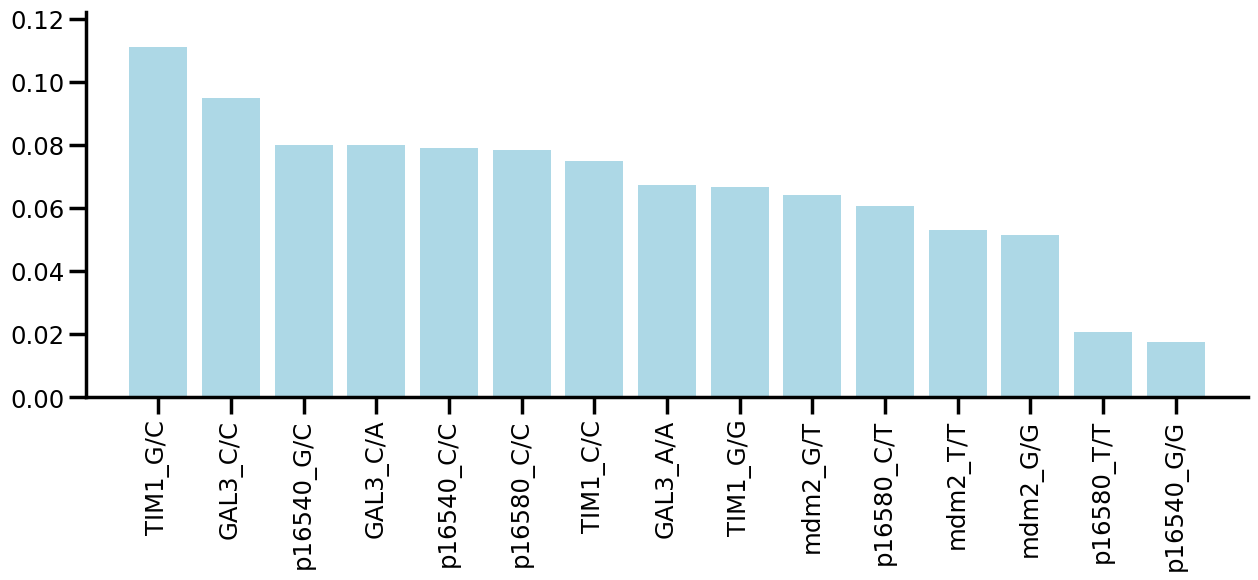

In [8]:
title = 'Feature Importances By RandomForest For Approach CDT_DI_FI_OHE'
save = f"{main_path}/figures/feature_importance_baseline.png"

figures.feature_importance_plot(baseline_df.values, targets, baseline_df.columns, figsize=(15, 5),
                                save=save, paper_figure=None)